# Read output data from gam_model.ipynb and make the figures and tables

__Note on the environment required to run the notebook:__

An installation of Python 3.9 with recent versions of the libraries (numpy, scipy, matplotlib, pandas, xarray, statsmodels) should run this Notebook wihout modification.

In [11]:
import matplotlib.pyplot as plt

import pandas as pd


In [22]:
# For higher resolution images on retina display screens
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')


#### Summary table of model performance

In [5]:
resm_df = pd.read_csv('./outputs/table_model_performance.csv')
resm_df.set_index('Statistical model', inplace=True)

In [6]:
resm_df

,Degrees of freedom,Deviance
Statistical model,,
Tr : Trend only,4.6,1167.0
TrNc : Trend and nodal tide,6.6,1031.0
"TrNcZw : Trend, nodal tide and wind (velocity)",7.6,428.0
"TrNcPd : Trend, nodal tide and wind (pressure)",7.6,652.0


Export to latex table format to copy paste directly to the paper

In [7]:
print(resm_df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Degrees of freedom &  Deviance \\
Statistical model                              &                     &           \\
\midrule
Tr : Trend only                                &                 4.6 &    1167.0 \\
TrNc : Trend and nodal tide                    &                 6.6 &    1031.0 \\
TrNcZw : Trend, nodal tide and wind (velocity) &                 7.6 &     428.0 \\
TrNcPd : Trend, nodal tide and wind (pressure) &                 7.6 &     652.0 \\
\bottomrule
\end{tabular}



### Read input data

In [17]:
tg_df = pd.read_csv('./outputs/data_tide_gauges.csv')

res_nr = pd.read_csv('./outputs/results_NoRegressor.csv')
res_nt = pd.read_csv('./outputs/results_NodalTide.csv')
res_na = pd.read_csv('./outputs/results_NearestPointAverage.csv')
res_pd = pd.read_csv('./outputs/results_PressureDifference.csv')

for df in [tg_df, res_nr, res_nt, res_na, res_pd]:
    df.set_index('time', inplace=True)

In [ ]:
rates_nr = pd.read_csv('./outputs/results_NoRegressor.csv')
rates_nt = pd.read_csv('./outputs/results_NodalTide.csv')
rates_na = pd.read_csv('./outputs/results_NearestPointAverage.csv')
rates_pd = pd.read_csv('./outputs/results_PressureDifference.csv')

In [20]:
long_names = ['Trend only', 
              'Trend and nodal tide', 
              'Trend, nodal tide and wind (velocity)', 
              'Trend, nodal tide and wind (pressure)']

short_names = ['Tr', 'TrNc', 'TrNcZw', 'TrNcPd']

comb_names = [f'{short_names[i]} : {long_names[i]}' for i in range(4)]

## Prepare figures paper

### Evaluation of statistical model

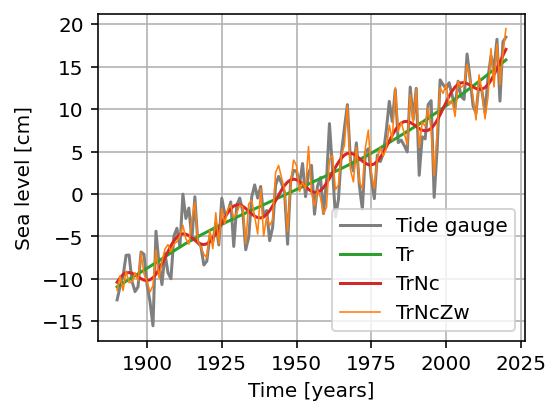

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(4,3)) #14,5

panels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:blue']

tg_df['Average'].plot(label='Tide gauge', color='tab:grey')
res_nr.total.plot(label=short_names[0], color=colors[0])
res_nt.total.plot(label=short_names[1], color=colors[1])
res_na.total.plot(label=short_names[2], color=colors[2], linewidth=0.8)

ax.set_ylabel('Sea level [cm]')
ax.grid(True)
ax.set_xlabel('Time [years]')
#ax.text(0.01, 0.92, panels[idx], transform=ax.flat[idx].transAxes, size=14)

ax.legend(loc='lower right')

    
fig.tight_layout()

#plt.savefig(f'./figures/{method}_TideGauge_StatModels.pdf', dpi=150)